In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#read json file
df = pd.read_json('all000a.json')

In [4]:
#renaming the column to make it accessible
df.columns = ['Item2472']

In [5]:
#dividing each entry into columns
df = pd.concat([df,df['Item2472'].apply(pd.Series)],axis=1)

In [6]:
df

,Item2472,0,1,2
0,"[1425600000000, 1863]",1.425600e+12,1863.0,NaN
1,"[1425686400000, 1863]",1.425686e+12,1863.0,NaN
2,"[1425772800000, 1863]",1.425773e+12,1863.0,NaN
3,"[1425859200000, 1773]",1.425859e+12,1773.0,NaN
4,"[1425945600000, 1773]",1.425946e+12,1773.0,NaN
...,...,...,...,...
2670,"[1664323200000, 85, 136]",1.664323e+12,85.0,136.0
2671,"[1664409600000, 85, 801]",1.664410e+12,85.0,801.0
2672,"[1664496000000, 85, 279]",1.664496e+12,85.0,279.0
2673,"[1664582400000, 85, 650]",1.664582e+12,85.0,650.0


In [7]:
#naming the column
df.columns = ['Item2472','Date','Price', 'Amount Sold']

In [8]:
#Change timestamp into real date
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'], unit = 'ms')

In [9]:
#https://stackoverflow.com/questions/64745344/reverse-rows-in-time-series-dataframe
#dataframe upside down
df_reverse = df.iloc[::-1]

In [10]:
df_reverse

,Item2472,Date,Price,Amount Sold
2674,"[1664668800000, 85]",2022-10-02,85.0,NaN
2673,"[1664582400000, 85, 650]",2022-10-01,85.0,650.0
2672,"[1664496000000, 85, 279]",2022-09-30,85.0,279.0
2671,"[1664409600000, 85, 801]",2022-09-29,85.0,801.0
2670,"[1664323200000, 85, 136]",2022-09-28,85.0,136.0
...,...,...,...,...
4,"[1425945600000, 1773]",2015-03-10,1773.0,NaN
3,"[1425859200000, 1773]",2015-03-09,1773.0,NaN
2,"[1425772800000, 1863]",2015-03-08,1863.0,NaN
1,"[1425686400000, 1863]",2015-03-07,1863.0,NaN


In [11]:
df_reverse['Date'] = pd.to_datetime(df_reverse['Date'])

In [12]:
#Date as index
#Drop duplicate date column
tdi = pd.DatetimeIndex(df_reverse.Date)
df_reverse.set_index(tdi, inplace=True)
df_reverse.drop(columns='Date', inplace=True)
df_reverse.index.name = 'Date'
df_reverse

,Item2472,Price,Amount Sold
Date,,,
2022-10-02,"[1664668800000, 85]",85.0,NaN
2022-10-01,"[1664582400000, 85, 650]",85.0,650.0
2022-09-30,"[1664496000000, 85, 279]",85.0,279.0
2022-09-29,"[1664409600000, 85, 801]",85.0,801.0
2022-09-28,"[1664323200000, 85, 136]",85.0,136.0
...,...,...,...
2015-03-10,"[1425945600000, 1773]",1773.0,NaN
2015-03-09,"[1425859200000, 1773]",1773.0,NaN
2015-03-08,"[1425772800000, 1863]",1863.0,NaN


In [13]:
#dropping unwanted columns 
df_reverse = df_reverse.drop(['Item2472', 'Price'], axis=1)

In [15]:
 df_reverse

,Amount Sold
Date,
2022-10-02,NaN
2022-10-01,650.0
2022-09-30,279.0
2022-09-29,801.0
2022-09-28,136.0
...,...
2015-03-10,NaN
2015-03-09,NaN
2015-03-08,NaN


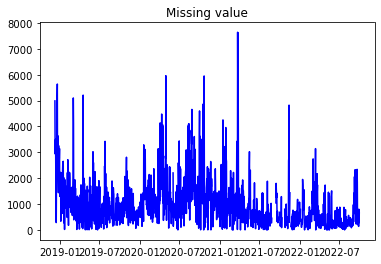

In [16]:
#simple data viz
# set the size of our plot
plt.rcParams['figure.figsize']=(15,7)
# plots our series
plt.plot(df_reverse, color='blue')
# adds title to our time series plot
plt.title('Missing value') 
# print the plot
plt.show()

In [17]:
len(df_reverse)

2675

In [18]:
#divided train and test(test includes from the missing value)
train = df_reverse.iloc[:1350]
test = df_reverse.iloc[1350:]

In [19]:
#drop null values
train = train.dropna()

In [20]:
train

,Amount Sold
Date,
2022-10-01,650.0
2022-09-30,279.0
2022-09-29,801.0
2022-09-28,136.0
2022-09-27,325.0
...,...
2019-01-26,1249.0
2019-01-25,1937.0
2019-01-24,1044.0


In [21]:
test

,Amount Sold
Date,
2019-01-21,906.0
2019-01-20,269.0
2019-01-19,2022.0
2019-01-18,1422.0
2019-01-17,2652.0
...,...
2015-03-10,NaN
2015-03-09,NaN
2015-03-08,NaN


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
#df_reverse.head(),df_reverse.tail()

In [25]:
#calculates (mean,max,SD)
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [26]:
scaled_train[:10]

array([[0.0850674 ],
       [0.03651355],
       [0.10482921],
       [0.01779872],
       [0.0425337 ],
       [0.08441303],
       [0.06124853],
       [0.02630546],
       [0.04724512],
       [0.24028269]])

In [27]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [30]:
# n_input = 3
# n_features = 1
# generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)
#For 12 months/30 days
#We are taking 30 days data reference to predict every new data.
n_input = 30
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [31]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.0850674  0.03651355 0.10482921 0.01779872 0.0425337  0.08441303
 0.06124853 0.02630546 0.04724512 0.24028269 0.30637351 0.17144353
 0.07917812 0.14893339 0.02944641 0.04855385 0.18714828 0.21384636
 0.21685643 0.30467216 0.15861798 0.10954064 0.26907473 0.08284256
 0.10142651 0.18583955 0.0410941  0.12747023 0.04606727 0.07211098]
Predict this y: 
 [[0.02120141]]


In [32]:
X.shape

(1, 30, 1)

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [34]:
#define model
model = Sequential()
#100 neurons
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(generator,epochs=50)

Epoch 1/50


2022-12-05 19:51:23.801747: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1279/1279 [==============================] - 7s 5ms/step - loss: 0.0112
Epoch 2/50
1279/1279 [==============================] - 6s 5ms/step - loss: 0.0107
Epoch 3/50
1279/1279 [==============================] - 6s 5ms/step - loss: 0.0105
Epoch 4/50
1279/1279 [==============================] - 6s 5ms/step - loss: 0.0102
Epoch 5/50
1279/1279 [==============================] - 6s 5ms/step - loss: 0.0102
Epoch 6/50
1279/1279 [==============================] - 6s 5ms/step - loss: 0.0100
Epoch 7/50
1279/1279 [==============================] - 6s 5ms/step - loss: 0.0100
Epoch 8/50
1279/1279 [==============================] - 6s 5ms/step - loss: 0.0100
Epoch 9/50
1279/1279 [==============================] - 6s 5ms/step - loss: 0.0099
Epoch 10/50
1279/1279 [==============================] - 6s 5ms/step - loss: 0.0100
Epoch 11/50
1279/1279 [==============================] - 6s 5ms/step - loss: 0.0100
Epoch 12/50
1279/1279 [==============================] - 6s 5ms/step - loss: 0.0100
Epoch 13/50


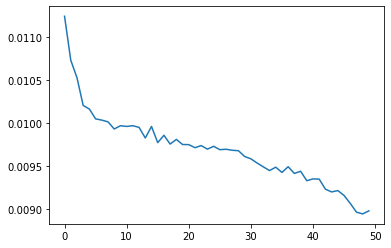

In [37]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [38]:
last_train_batch = scaled_train[-30:]

In [39]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [40]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 148ms/step


array([[0.16934478]], dtype=float32)

In [41]:
scaled_test[0]

array([0.11857087])

In [42]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    
    #last 12 values for the prediction
    #get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    #append the prediction into the array
    test_predictions.append(current_pred)
    
    #use the predictions to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


In [43]:
#test_predictions

In [44]:
true_predictions = scaler.inverse_transform(test_predictions)

In [45]:
import pandas as pd
testtry = pd.DataFrame(true_predictions, columns = ['Predicted Amount Sold'])

In [46]:
testtry

,Predicted Amount Sold
0,1293.963486
1,1245.638893
2,1204.475967
3,1179.069980
4,1165.801218
...,...
1320,1259.977596
1321,1259.977596
1322,1259.977596
1323,1259.977596


In [47]:
#concatenation
#I want to add the predicted amount sold to the training data
#Adding predicted values next to the testing data.
# train_predictions = model1.predict(X_train1).flatten()
#train_results = pd.DataFrame(data={'Train Predictions':testry['Predicted Amount Sold']})
# train_results = pd.Datafram()

In [ ]:
#My todo list
# Merge the predicted amount sold to the testing data/missing amount sold.
#Merge all the data into one
#figure out how to implement in multiplt json.
